In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_train='/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Train'
data_validation='/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Test'
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Train',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Validation',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 1595 images belonging to 40 classes.
Found 796 images belonging to 40 classes.


In [5]:
kieuhinh=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [6]:
training_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1595 images belonging to 40 classes.


In [7]:
validation_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 796 images belonging to 40 classes.


In [8]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
#model.add(Dropout(0.2))
model.add(Dense(40,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 43808)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [9]:
training_data.class_indices

{'LaBacHa': 0,
 'LaBachDauOng': 1,
 'LaBachTruat': 2,
 'LaBoChinhSam': 3,
 'LaCayBoCongAnh': 4,
 'LaCayBoKet': 5,
 'LaCayBoQuan': 6,
 'LaCayCucAo': 7,
 'LaCayDiepCa': 8,
 'LaCayDuDu': 9,
 'LaCayDuaCan': 10,
 'LaCayHamEch': 11,
 'LaCayHoaXaThietThao': 12,
 'LaCayHoangCamRau': 13,
 'LaCayKhaTu': 14,
 'LaCayKimNganHoa': 15,
 'LaCayLuocVang': 16,
 'LaCayMangCau': 17,
 'LaCayNgheDen': 18,
 'LaCayNgheVang': 19,
 'LaCayOliu': 20,
 'LaCayRauMa': 21,
 'LaCayRauSam': 22,
 'LaCaySe': 23,
 'LaCaySoiRung': 24,
 'LaCayThongMoc': 25,
 'LaCayTrinhNu': 26,
 'LaCayTrinhNuHoangCung': 27,
 'LaCayXaDen': 28,
 'LaCayYdi': 29,
 'LaCotKhi': 30,
 'LaCucTan': 31,
 'LaDauTam': 32,
 'LaDiaLien': 33,
 'LaGai': 34,
 'LaHungChanh': 35,
 'LaKhoSam': 36,
 'LaMo': 37,
 'LaOi': 38,
 'LaTiaTo': 39}

In [10]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [11]:
callbacks=[EarlyStopping(monitor='val_loss',patience=20)]
history=model.fit(training_data,
                  steps_per_epoch=len(training_data),
                  batch_size = 64,
                  epochs=200,
                  validation_data=validation_data,
                  validation_steps=len(validation_data),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/200
38/50 [=====================>........] - ETA: 1:57 - loss: 4.4609 - accuracy: 0.0182

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


50/50 [==============================] - 708s 14s/step - loss: 4.2754 - accuracy: 0.0169 - val_loss: 3.6889 - val_accuracy: 0.0264
Epoch 2/200
50/50 [==============================] - 42s 838ms/step - loss: 3.6891 - accuracy: 0.0182 - val_loss: 3.6876 - val_accuracy: 0.0314
Epoch 3/200
50/50 [==============================] - 41s 823ms/step - loss: 3.6834 - accuracy: 0.0364 - val_loss: 3.6763 - val_accuracy: 0.0503
Epoch 4/200
50/50 [==============================] - 40s 812ms/step - loss: 3.6430 - accuracy: 0.0464 - val_loss: 3.5816 - val_accuracy: 0.0641
Epoch 5/200
50/50 [==============================] - 40s 814ms/step - loss: 3.5779 - accuracy: 0.0665 - val_loss: 3.4183 - val_accuracy: 0.1256
Epoch 6/200
50/50 [==============================] - 41s 818ms/step - loss: 3.4352 - accuracy: 0.1110 - val_loss: 3.3379 - val_accuracy: 0.1382
Epoch 7/200
50/50 [==============================] - 40s 803ms/step - loss: 3.3347 - accuracy: 0.1398 - val_loss: 3.1735 - val_accuracy: 0.1847
Epoch

Sai số kiểm tra là:  0.2801884412765503
Độ chính xác kiểm tra là:  0.9510050415992737


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


<function matplotlib.pyplot.show>

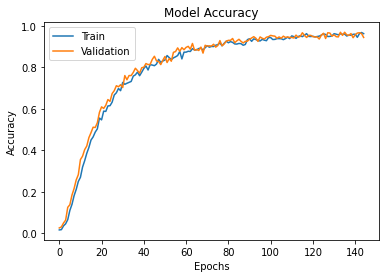

In [12]:
score = model.evaluate(validation_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [13]:
model.save("/content/drive/MyDrive/Colab Notebooks/Model_CNN_NHAN_DIEN_LA_CAY_THUOC/Model_CNN_Nhan_Dien_La_Cay_Thuoc.h5")

In [14]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/Model_CNN_NHAN_DIEN_LA_CAY_THUOC/Model_CNN_Nhan_Dien_La_Cay_Thuoc.h5')

Lá Bạc Hà


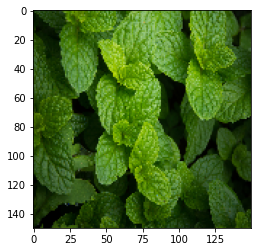

In [56]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Test/LaBacHa/Image_ 1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Lá Bạc Hà'
if round(result[0][1])==1:
  prediction='Lá Bạch Đầu Ông'
if round(result[0][2])==1:
  prediction='Lá Bạch Truất'
if round(result[0][3])==1:
  prediction='Lá Bố Chính Sâm'
if round(result[0][4])==1:
  prediction='Lá Cây Bồ Công Anh'
if round(result[0][5])==1:
  prediction='Lá Cây Bồ Kết'
if round(result[0][6])==1:
  prediction='Lá Cây Bồ Quân'
if round(result[0][7])==1:
  prediction='Lá Cây Cúc Áo'
if round(result[0][8])==1:
  prediction='Lá Cây Diếp Cá'
if round(result[0][9])==1:
  prediction='Lá Cây Đu Đủ'
if round(result[0][10])==1:
  prediction='Lá Cây Dừa Cạn'
if round(result[0][11])==1:
  prediction='Lá Cây Hàm Ếch'
if round(result[0][12])==1:
  prediction='Lá Cây Bạch Hoa Xà Thiệt Thảo'
if round(result[0][13])==1:
  prediction='Lá Cây Hoàng Cầm Râu'
if round(result[0][14])==1:
  prediction='Lá Cây Kha Tử'
if round(result[0][15])==1:
  prediction='Lá Cây Kim Ngân Hoa'
if round(result[0][16])==1:
  prediction='Lá Cây Lược Vàng'
if round(result[0][17])==1:
  prediction='Lá Cây Mãng Cầu'
if round(result[0][18])==1:
  prediction='Lá Cây Nghệ Đen'
if round(result[0][19])==1:
  prediction='Lá Cây Nghệ Vàng '
if round(result[0][20])==1:
  prediction='Lá Cây Ô Liu'
if round(result[0][21])==1:
  prediction='Lá Cây Rau Má'
if round(result[0][22])==1:
  prediction='Lá Cây Rau Sam'
if round(result[0][23])==1:
  prediction='Lá Cây Sê'
if round(result[0][24])==1:
  prediction='Lá Cây Sói Rừng'
if round(result[0][25])==1:
  prediction='Lá Cây Mộc Thông'
if round(result[0][26])==1:
  prediction='Lá Cây Trinh Nữ'
if round(result[0][27])==1:
  prediction='Lá Cây Trinh Nữ Hoàng Cung'
if round(result[0][28])==1:
  prediction='Lá Cây Xạ Đen'
if round(result[0][29])==1:
  prediction='Lá Cây Ý Dĩ'
if round(result[0][30])==1:
  prediction='Lá Cốt Khí'
if round(result[0][31])==1:
  prediction='Lá Cúc Tần'
if round(result[0][32])==1:
  prediction='Lá Dâu Tằm'
if round(result[0][33])==1:
  prediction='Lá Địa Liền'
if round(result[0][34])==1:
  prediction='Lá Gai'
if round(result[0][35])==1:
  prediction='Lá Húng Chanh'
if round(result[0][36])==1:
  prediction='Lá Khổ Sâm'
if round(result[0][37])==1:
  prediction='Lá Mơ'
if round(result[0][38])==1:
  prediction='Lá Ổi'
if round(result[0][39])==1:
  prediction='Lá Tía Tô'
print(prediction)

Lá Cây Đu Đủ


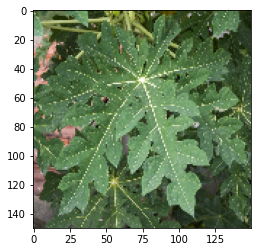

In [57]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Test/LaCayDuDu/02.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Lá Bạc Hà'
if round(result[0][1])==1:
  prediction='Lá Bạch Đầu Ông'
if round(result[0][2])==1:
  prediction='Lá Bạch Truất'
if round(result[0][3])==1:
  prediction='Lá Bố Chính Sâm'
if round(result[0][4])==1:
  prediction='Lá Cây Bồ Công Anh'
if round(result[0][5])==1:
  prediction='Lá Cây Bồ Kết'
if round(result[0][6])==1:
  prediction='Lá Cây Bồ Quân'
if round(result[0][7])==1:
  prediction='Lá Cây Cúc Áo'
if round(result[0][8])==1:
  prediction='Lá Cây Diếp Cá'
if round(result[0][9])==1:
  prediction='Lá Cây Đu Đủ'
if round(result[0][10])==1:
  prediction='Lá Cây Dừa Cạn'
if round(result[0][11])==1:
  prediction='Lá Cây Hàm Ếch'
if round(result[0][12])==1:
  prediction='Lá Cây Bạch Hoa Xà Thiệt Thảo'
if round(result[0][13])==1:
  prediction='Lá Cây Hoàng Cầm Râu'
if round(result[0][14])==1:
  prediction='Lá Cây Kha Tử'
if round(result[0][15])==1:
  prediction='Lá Cây Kim Ngân Hoa'
if round(result[0][16])==1:
  prediction='Lá Cây Lược Vàng'
if round(result[0][17])==1:
  prediction='Lá Cây Mãng Cầu'
if round(result[0][18])==1:
  prediction='Lá Cây Nghệ Đen'
if round(result[0][19])==1:
  prediction='Lá Cây Nghệ Vàng '
if round(result[0][20])==1:
  prediction='Lá Cây Ô Liu'
if round(result[0][21])==1:
  prediction='Lá Cây Rau Má'
if round(result[0][22])==1:
  prediction='Lá Cây Rau Sam'
if round(result[0][23])==1:
  prediction='Lá Cây Sê'
if round(result[0][24])==1:
  prediction='Lá Cây Sói Rừng'
if round(result[0][25])==1:
  prediction='Lá Cây Mộc Thông'
if round(result[0][26])==1:
  prediction='Lá Cây Trinh Nữ'
if round(result[0][27])==1:
  prediction='Lá Cây Trinh Nữ Hoàng Cung'
if round(result[0][28])==1:
  prediction='Lá Cây Xạ Đen'
if round(result[0][29])==1:
  prediction='Lá Cây Ý Dĩ'
if round(result[0][30])==1:
  prediction='Lá Cốt Khí'
if round(result[0][31])==1:
  prediction='Lá Cúc Tần'
if round(result[0][32])==1:
  prediction='Lá Dâu Tằm'
if round(result[0][33])==1:
  prediction='Lá Địa Liền'
if round(result[0][34])==1:
  prediction='Lá Gai'
if round(result[0][35])==1:
  prediction='Lá Húng Chanh'
if round(result[0][36])==1:
  prediction='Lá Khổ Sâm'
if round(result[0][37])==1:
  prediction='Lá Mơ'
if round(result[0][38])==1:
  prediction='Lá Ổi'
if round(result[0][39])==1:
  prediction='Lá Tía Tô'
print(prediction)

Lá Cây Bồ Kết


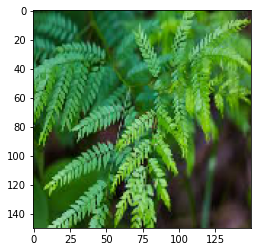

In [60]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Test/LaCayBoKet/13.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Lá Bạc Hà'
if round(result[0][1])==1:
  prediction='Lá Bạch Đầu Ông'
if round(result[0][2])==1:
  prediction='Lá Bạch Truất'
if round(result[0][3])==1:
  prediction='Lá Bố Chính Sâm'
if round(result[0][4])==1:
  prediction='Lá Cây Bồ Công Anh'
if round(result[0][5])==1:
  prediction='Lá Cây Bồ Kết'
if round(result[0][6])==1:
  prediction='Lá Cây Bồ Quân'
if round(result[0][7])==1:
  prediction='Lá Cây Cúc Áo'
if round(result[0][8])==1:
  prediction='Lá Cây Diếp Cá'
if round(result[0][9])==1:
  prediction='Lá Cây Đu Đủ'
if round(result[0][10])==1:
  prediction='Lá Cây Dừa Cạn'
if round(result[0][11])==1:
  prediction='Lá Cây Hàm Ếch'
if round(result[0][12])==1:
  prediction='Lá Cây Bạch Hoa Xà Thiệt Thảo'
if round(result[0][13])==1:
  prediction='Lá Cây Hoàng Cầm Râu'
if round(result[0][14])==1:
  prediction='Lá Cây Kha Tử'
if round(result[0][15])==1:
  prediction='Lá Cây Kim Ngân Hoa'
if round(result[0][16])==1:
  prediction='Lá Cây Lược Vàng'
if round(result[0][17])==1:
  prediction='Lá Cây Mãng Cầu'
if round(result[0][18])==1:
  prediction='Lá Cây Nghệ Đen'
if round(result[0][19])==1:
  prediction='Lá Cây Nghệ Vàng '
if round(result[0][20])==1:
  prediction='Lá Cây Ô Liu'
if round(result[0][21])==1:
  prediction='Lá Cây Rau Má'
if round(result[0][22])==1:
  prediction='Lá Cây Rau Sam'
if round(result[0][23])==1:
  prediction='Lá Cây Sê'
if round(result[0][24])==1:
  prediction='Lá Cây Sói Rừng'
if round(result[0][25])==1:
  prediction='Lá Cây Mộc Thông'
if round(result[0][26])==1:
  prediction='Lá Cây Trinh Nữ'
if round(result[0][27])==1:
  prediction='Lá Cây Trinh Nữ Hoàng Cung'
if round(result[0][28])==1:
  prediction='Lá Cây Xạ Đen'
if round(result[0][29])==1:
  prediction='Lá Cây Ý Dĩ'
if round(result[0][30])==1:
  prediction='Lá Cốt Khí'
if round(result[0][31])==1:
  prediction='Lá Cúc Tần'
if round(result[0][32])==1:
  prediction='Lá Dâu Tằm'
if round(result[0][33])==1:
  prediction='Lá Địa Liền'
if round(result[0][34])==1:
  prediction='Lá Gai'
if round(result[0][35])==1:
  prediction='Lá Húng Chanh'
if round(result[0][36])==1:
  prediction='Lá Khổ Sâm'
if round(result[0][37])==1:
  prediction='Lá Mơ'
if round(result[0][38])==1:
  prediction='Lá Ổi'
if round(result[0][39])==1:
  prediction='Lá Tía Tô'
print(prediction)

Lá Cúc Tần


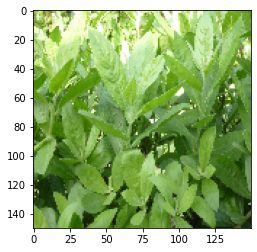

In [61]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Test/LaCucTan/Image_ 1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Lá Bạc Hà'
if round(result[0][1])==1:
  prediction='Lá Bạch Đầu Ông'
if round(result[0][2])==1:
  prediction='Lá Bạch Truất'
if round(result[0][3])==1:
  prediction='Lá Bố Chính Sâm'
if round(result[0][4])==1:
  prediction='Lá Cây Bồ Công Anh'
if round(result[0][5])==1:
  prediction='Lá Cây Bồ Kết'
if round(result[0][6])==1:
  prediction='Lá Cây Bồ Quân'
if round(result[0][7])==1:
  prediction='Lá Cây Cúc Áo'
if round(result[0][8])==1:
  prediction='Lá Cây Diếp Cá'
if round(result[0][9])==1:
  prediction='Lá Cây Đu Đủ'
if round(result[0][10])==1:
  prediction='Lá Cây Dừa Cạn'
if round(result[0][11])==1:
  prediction='Lá Cây Hàm Ếch'
if round(result[0][12])==1:
  prediction='Lá Cây Bạch Hoa Xà Thiệt Thảo'
if round(result[0][13])==1:
  prediction='Lá Cây Hoàng Cầm Râu'
if round(result[0][14])==1:
  prediction='Lá Cây Kha Tử'
if round(result[0][15])==1:
  prediction='Lá Cây Kim Ngân Hoa'
if round(result[0][16])==1:
  prediction='Lá Cây Lược Vàng'
if round(result[0][17])==1:
  prediction='Lá Cây Mãng Cầu'
if round(result[0][18])==1:
  prediction='Lá Cây Nghệ Đen'
if round(result[0][19])==1:
  prediction='Lá Cây Nghệ Vàng '
if round(result[0][20])==1:
  prediction='Lá Cây Ô Liu'
if round(result[0][21])==1:
  prediction='Lá Cây Rau Má'
if round(result[0][22])==1:
  prediction='Lá Cây Rau Sam'
if round(result[0][23])==1:
  prediction='Lá Cây Sê'
if round(result[0][24])==1:
  prediction='Lá Cây Sói Rừng'
if round(result[0][25])==1:
  prediction='Lá Cây Mộc Thông'
if round(result[0][26])==1:
  prediction='Lá Cây Trinh Nữ'
if round(result[0][27])==1:
  prediction='Lá Cây Trinh Nữ Hoàng Cung'
if round(result[0][28])==1:
  prediction='Lá Cây Xạ Đen'
if round(result[0][29])==1:
  prediction='Lá Cây Ý Dĩ'
if round(result[0][30])==1:
  prediction='Lá Cốt Khí'
if round(result[0][31])==1:
  prediction='Lá Cúc Tần'
if round(result[0][32])==1:
  prediction='Lá Dâu Tằm'
if round(result[0][33])==1:
  prediction='Lá Địa Liền'
if round(result[0][34])==1:
  prediction='Lá Gai'
if round(result[0][35])==1:
  prediction='Lá Húng Chanh'
if round(result[0][36])==1:
  prediction='Lá Khổ Sâm'
if round(result[0][37])==1:
  prediction='Lá Mơ'
if round(result[0][38])==1:
  prediction='Lá Ổi'
if round(result[0][39])==1:
  prediction='Lá Tía Tô'
print(prediction)

Lá Gai


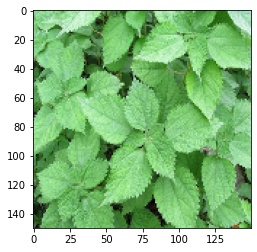

In [62]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Test/LaGai/Image_ 12.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Lá Bạc Hà'
if round(result[0][1])==1:
  prediction='Lá Bạch Đầu Ông'
if round(result[0][2])==1:
  prediction='Lá Bạch Truất'
if round(result[0][3])==1:
  prediction='Lá Bố Chính Sâm'
if round(result[0][4])==1:
  prediction='Lá Cây Bồ Công Anh'
if round(result[0][5])==1:
  prediction='Lá Cây Bồ Kết'
if round(result[0][6])==1:
  prediction='Lá Cây Bồ Quân'
if round(result[0][7])==1:
  prediction='Lá Cây Cúc Áo'
if round(result[0][8])==1:
  prediction='Lá Cây Diếp Cá'
if round(result[0][9])==1:
  prediction='Lá Cây Đu Đủ'
if round(result[0][10])==1:
  prediction='Lá Cây Dừa Cạn'
if round(result[0][11])==1:
  prediction='Lá Cây Hàm Ếch'
if round(result[0][12])==1:
  prediction='Lá Cây Bạch Hoa Xà Thiệt Thảo'
if round(result[0][13])==1:
  prediction='Lá Cây Hoàng Cầm Râu'
if round(result[0][14])==1:
  prediction='Lá Cây Kha Tử'
if round(result[0][15])==1:
  prediction='Lá Cây Kim Ngân Hoa'
if round(result[0][16])==1:
  prediction='Lá Cây Lược Vàng'
if round(result[0][17])==1:
  prediction='Lá Cây Mãng Cầu'
if round(result[0][18])==1:
  prediction='Lá Cây Nghệ Đen'
if round(result[0][19])==1:
  prediction='Lá Cây Nghệ Vàng '
if round(result[0][20])==1:
  prediction='Lá Cây Ô Liu'
if round(result[0][21])==1:
  prediction='Lá Cây Rau Má'
if round(result[0][22])==1:
  prediction='Lá Cây Rau Sam'
if round(result[0][23])==1:
  prediction='Lá Cây Sê'
if round(result[0][24])==1:
  prediction='Lá Cây Sói Rừng'
if round(result[0][25])==1:
  prediction='Lá Cây Mộc Thông'
if round(result[0][26])==1:
  prediction='Lá Cây Trinh Nữ'
if round(result[0][27])==1:
  prediction='Lá Cây Trinh Nữ Hoàng Cung'
if round(result[0][28])==1:
  prediction='Lá Cây Xạ Đen'
if round(result[0][29])==1:
  prediction='Lá Cây Ý Dĩ'
if round(result[0][30])==1:
  prediction='Lá Cốt Khí'
if round(result[0][31])==1:
  prediction='Lá Cúc Tần'
if round(result[0][32])==1:
  prediction='Lá Dâu Tằm'
if round(result[0][33])==1:
  prediction='Lá Địa Liền'
if round(result[0][34])==1:
  prediction='Lá Gai'
if round(result[0][35])==1:
  prediction='Lá Húng Chanh'
if round(result[0][36])==1:
  prediction='Lá Khổ Sâm'
if round(result[0][37])==1:
  prediction='Lá Mơ'
if round(result[0][38])==1:
  prediction='Lá Ổi'
if round(result[0][39])==1:
  prediction='Lá Tía Tô'
print(prediction)

Lá Mơ


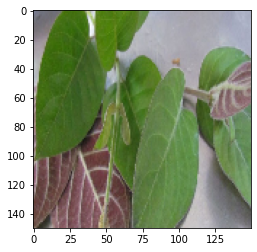

In [63]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Test/LaMo/Image_ 13.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Lá Bạc Hà'
if round(result[0][1])==1:
  prediction='Lá Bạch Đầu Ông'
if round(result[0][2])==1:
  prediction='Lá Bạch Truất'
if round(result[0][3])==1:
  prediction='Lá Bố Chính Sâm'
if round(result[0][4])==1:
  prediction='Lá Cây Bồ Công Anh'
if round(result[0][5])==1:
  prediction='Lá Cây Bồ Kết'
if round(result[0][6])==1:
  prediction='Lá Cây Bồ Quân'
if round(result[0][7])==1:
  prediction='Lá Cây Cúc Áo'
if round(result[0][8])==1:
  prediction='Lá Cây Diếp Cá'
if round(result[0][9])==1:
  prediction='Lá Cây Đu Đủ'
if round(result[0][10])==1:
  prediction='Lá Cây Dừa Cạn'
if round(result[0][11])==1:
  prediction='Lá Cây Hàm Ếch'
if round(result[0][12])==1:
  prediction='Lá Cây Bạch Hoa Xà Thiệt Thảo'
if round(result[0][13])==1:
  prediction='Lá Cây Hoàng Cầm Râu'
if round(result[0][14])==1:
  prediction='Lá Cây Kha Tử'
if round(result[0][15])==1:
  prediction='Lá Cây Kim Ngân Hoa'
if round(result[0][16])==1:
  prediction='Lá Cây Lược Vàng'
if round(result[0][17])==1:
  prediction='Lá Cây Mãng Cầu'
if round(result[0][18])==1:
  prediction='Lá Cây Nghệ Đen'
if round(result[0][19])==1:
  prediction='Lá Cây Nghệ Vàng '
if round(result[0][20])==1:
  prediction='Lá Cây Ô Liu'
if round(result[0][21])==1:
  prediction='Lá Cây Rau Má'
if round(result[0][22])==1:
  prediction='Lá Cây Rau Sam'
if round(result[0][23])==1:
  prediction='Lá Cây Sê'
if round(result[0][24])==1:
  prediction='Lá Cây Sói Rừng'
if round(result[0][25])==1:
  prediction='Lá Cây Mộc Thông'
if round(result[0][26])==1:
  prediction='Lá Cây Trinh Nữ'
if round(result[0][27])==1:
  prediction='Lá Cây Trinh Nữ Hoàng Cung'
if round(result[0][28])==1:
  prediction='Lá Cây Xạ Đen'
if round(result[0][29])==1:
  prediction='Lá Cây Ý Dĩ'
if round(result[0][30])==1:
  prediction='Lá Cốt Khí'
if round(result[0][31])==1:
  prediction='Lá Cúc Tần'
if round(result[0][32])==1:
  prediction='Lá Dâu Tằm'
if round(result[0][33])==1:
  prediction='Lá Địa Liền'
if round(result[0][34])==1:
  prediction='Lá Gai'
if round(result[0][35])==1:
  prediction='Lá Húng Chanh'
if round(result[0][36])==1:
  prediction='Lá Khổ Sâm'
if round(result[0][37])==1:
  prediction='Lá Mơ'
if round(result[0][38])==1:
  prediction='Lá Ổi'
if round(result[0][39])==1:
  prediction='Lá Tía Tô'
print(prediction)

Lá Khổ Sâm


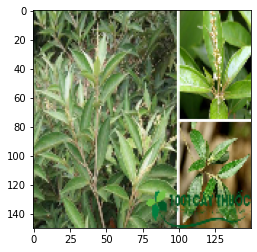

In [64]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Test/LaKhoSam/Image_ 17.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Lá Bạc Hà'
if round(result[0][1])==1:
  prediction='Lá Bạch Đầu Ông'
if round(result[0][2])==1:
  prediction='Lá Bạch Truất'
if round(result[0][3])==1:
  prediction='Lá Bố Chính Sâm'
if round(result[0][4])==1:
  prediction='Lá Cây Bồ Công Anh'
if round(result[0][5])==1:
  prediction='Lá Cây Bồ Kết'
if round(result[0][6])==1:
  prediction='Lá Cây Bồ Quân'
if round(result[0][7])==1:
  prediction='Lá Cây Cúc Áo'
if round(result[0][8])==1:
  prediction='Lá Cây Diếp Cá'
if round(result[0][9])==1:
  prediction='Lá Cây Đu Đủ'
if round(result[0][10])==1:
  prediction='Lá Cây Dừa Cạn'
if round(result[0][11])==1:
  prediction='Lá Cây Hàm Ếch'
if round(result[0][12])==1:
  prediction='Lá Cây Bạch Hoa Xà Thiệt Thảo'
if round(result[0][13])==1:
  prediction='Lá Cây Hoàng Cầm Râu'
if round(result[0][14])==1:
  prediction='Lá Cây Kha Tử'
if round(result[0][15])==1:
  prediction='Lá Cây Kim Ngân Hoa'
if round(result[0][16])==1:
  prediction='Lá Cây Lược Vàng'
if round(result[0][17])==1:
  prediction='Lá Cây Mãng Cầu'
if round(result[0][18])==1:
  prediction='Lá Cây Nghệ Đen'
if round(result[0][19])==1:
  prediction='Lá Cây Nghệ Vàng '
if round(result[0][20])==1:
  prediction='Lá Cây Ô Liu'
if round(result[0][21])==1:
  prediction='Lá Cây Rau Má'
if round(result[0][22])==1:
  prediction='Lá Cây Rau Sam'
if round(result[0][23])==1:
  prediction='Lá Cây Sê'
if round(result[0][24])==1:
  prediction='Lá Cây Sói Rừng'
if round(result[0][25])==1:
  prediction='Lá Cây Mộc Thông'
if round(result[0][26])==1:
  prediction='Lá Cây Trinh Nữ'
if round(result[0][27])==1:
  prediction='Lá Cây Trinh Nữ Hoàng Cung'
if round(result[0][28])==1:
  prediction='Lá Cây Xạ Đen'
if round(result[0][29])==1:
  prediction='Lá Cây Ý Dĩ'
if round(result[0][30])==1:
  prediction='Lá Cốt Khí'
if round(result[0][31])==1:
  prediction='Lá Cúc Tần'
if round(result[0][32])==1:
  prediction='Lá Dâu Tằm'
if round(result[0][33])==1:
  prediction='Lá Địa Liền'
if round(result[0][34])==1:
  prediction='Lá Gai'
if round(result[0][35])==1:
  prediction='Lá Húng Chanh'
if round(result[0][36])==1:
  prediction='Lá Khổ Sâm'
if round(result[0][37])==1:
  prediction='Lá Mơ'
if round(result[0][38])==1:
  prediction='Lá Ổi'
if round(result[0][39])==1:
  prediction='Lá Tía Tô'
print(prediction)

Lá Tía Tô


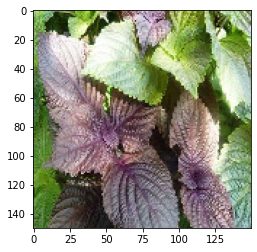

In [65]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Test/LaTiaTo/Image_ 14.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Lá Bạc Hà'
if round(result[0][1])==1:
  prediction='Lá Bạch Đầu Ông'
if round(result[0][2])==1:
  prediction='Lá Bạch Truất'
if round(result[0][3])==1:
  prediction='Lá Bố Chính Sâm'
if round(result[0][4])==1:
  prediction='Lá Cây Bồ Công Anh'
if round(result[0][5])==1:
  prediction='Lá Cây Bồ Kết'
if round(result[0][6])==1:
  prediction='Lá Cây Bồ Quân'
if round(result[0][7])==1:
  prediction='Lá Cây Cúc Áo'
if round(result[0][8])==1:
  prediction='Lá Cây Diếp Cá'
if round(result[0][9])==1:
  prediction='Lá Cây Đu Đủ'
if round(result[0][10])==1:
  prediction='Lá Cây Dừa Cạn'
if round(result[0][11])==1:
  prediction='Lá Cây Hàm Ếch'
if round(result[0][12])==1:
  prediction='Lá Cây Bạch Hoa Xà Thiệt Thảo'
if round(result[0][13])==1:
  prediction='Lá Cây Hoàng Cầm Râu'
if round(result[0][14])==1:
  prediction='Lá Cây Kha Tử'
if round(result[0][15])==1:
  prediction='Lá Cây Kim Ngân Hoa'
if round(result[0][16])==1:
  prediction='Lá Cây Lược Vàng'
if round(result[0][17])==1:
  prediction='Lá Cây Mãng Cầu'
if round(result[0][18])==1:
  prediction='Lá Cây Nghệ Đen'
if round(result[0][19])==1:
  prediction='Lá Cây Nghệ Vàng '
if round(result[0][20])==1:
  prediction='Lá Cây Ô Liu'
if round(result[0][21])==1:
  prediction='Lá Cây Rau Má'
if round(result[0][22])==1:
  prediction='Lá Cây Rau Sam'
if round(result[0][23])==1:
  prediction='Lá Cây Sê'
if round(result[0][24])==1:
  prediction='Lá Cây Sói Rừng'
if round(result[0][25])==1:
  prediction='Lá Cây Mộc Thông'
if round(result[0][26])==1:
  prediction='Lá Cây Trinh Nữ'
if round(result[0][27])==1:
  prediction='Lá Cây Trinh Nữ Hoàng Cung'
if round(result[0][28])==1:
  prediction='Lá Cây Xạ Đen'
if round(result[0][29])==1:
  prediction='Lá Cây Ý Dĩ'
if round(result[0][30])==1:
  prediction='Lá Cốt Khí'
if round(result[0][31])==1:
  prediction='Lá Cúc Tần'
if round(result[0][32])==1:
  prediction='Lá Dâu Tằm'
if round(result[0][33])==1:
  prediction='Lá Địa Liền'
if round(result[0][34])==1:
  prediction='Lá Gai'
if round(result[0][35])==1:
  prediction='Lá Húng Chanh'
if round(result[0][36])==1:
  prediction='Lá Khổ Sâm'
if round(result[0][37])==1:
  prediction='Lá Mơ'
if round(result[0][38])==1:
  prediction='Lá Ổi'
if round(result[0][39])==1:
  prediction='Lá Tía Tô'
print(prediction)

Lá Ổi


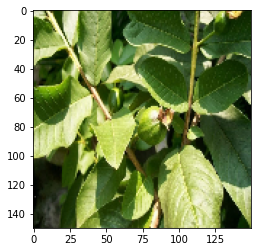

In [66]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Test/LaOi/Image_ 20.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Lá Bạc Hà'
if round(result[0][1])==1:
  prediction='Lá Bạch Đầu Ông'
if round(result[0][2])==1:
  prediction='Lá Bạch Truất'
if round(result[0][3])==1:
  prediction='Lá Bố Chính Sâm'
if round(result[0][4])==1:
  prediction='Lá Cây Bồ Công Anh'
if round(result[0][5])==1:
  prediction='Lá Cây Bồ Kết'
if round(result[0][6])==1:
  prediction='Lá Cây Bồ Quân'
if round(result[0][7])==1:
  prediction='Lá Cây Cúc Áo'
if round(result[0][8])==1:
  prediction='Lá Cây Diếp Cá'
if round(result[0][9])==1:
  prediction='Lá Cây Đu Đủ'
if round(result[0][10])==1:
  prediction='Lá Cây Dừa Cạn'
if round(result[0][11])==1:
  prediction='Lá Cây Hàm Ếch'
if round(result[0][12])==1:
  prediction='Lá Cây Bạch Hoa Xà Thiệt Thảo'
if round(result[0][13])==1:
  prediction='Lá Cây Hoàng Cầm Râu'
if round(result[0][14])==1:
  prediction='Lá Cây Kha Tử'
if round(result[0][15])==1:
  prediction='Lá Cây Kim Ngân Hoa'
if round(result[0][16])==1:
  prediction='Lá Cây Lược Vàng'
if round(result[0][17])==1:
  prediction='Lá Cây Mãng Cầu'
if round(result[0][18])==1:
  prediction='Lá Cây Nghệ Đen'
if round(result[0][19])==1:
  prediction='Lá Cây Nghệ Vàng '
if round(result[0][20])==1:
  prediction='Lá Cây Ô Liu'
if round(result[0][21])==1:
  prediction='Lá Cây Rau Má'
if round(result[0][22])==1:
  prediction='Lá Cây Rau Sam'
if round(result[0][23])==1:
  prediction='Lá Cây Sê'
if round(result[0][24])==1:
  prediction='Lá Cây Sói Rừng'
if round(result[0][25])==1:
  prediction='Lá Cây Mộc Thông'
if round(result[0][26])==1:
  prediction='Lá Cây Trinh Nữ'
if round(result[0][27])==1:
  prediction='Lá Cây Trinh Nữ Hoàng Cung'
if round(result[0][28])==1:
  prediction='Lá Cây Xạ Đen'
if round(result[0][29])==1:
  prediction='Lá Cây Ý Dĩ'
if round(result[0][30])==1:
  prediction='Lá Cốt Khí'
if round(result[0][31])==1:
  prediction='Lá Cúc Tần'
if round(result[0][32])==1:
  prediction='Lá Dâu Tằm'
if round(result[0][33])==1:
  prediction='Lá Địa Liền'
if round(result[0][34])==1:
  prediction='Lá Gai'
if round(result[0][35])==1:
  prediction='Lá Húng Chanh'
if round(result[0][36])==1:
  prediction='Lá Khổ Sâm'
if round(result[0][37])==1:
  prediction='Lá Mơ'
if round(result[0][38])==1:
  prediction='Lá Ổi'
if round(result[0][39])==1:
  prediction='Lá Tía Tô'
print(prediction)

Lá Bố Chính Sâm


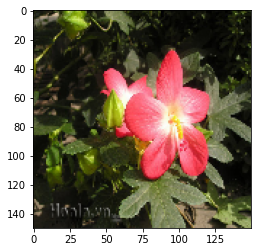

In [67]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Test/LaBoChinhSam/Image_ 10.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Lá Bạc Hà'
if round(result[0][1])==1:
  prediction='Lá Bạch Đầu Ông'
if round(result[0][2])==1:
  prediction='Lá Bạch Truất'
if round(result[0][3])==1:
  prediction='Lá Bố Chính Sâm'
if round(result[0][4])==1:
  prediction='Lá Cây Bồ Công Anh'
if round(result[0][5])==1:
  prediction='Lá Cây Bồ Kết'
if round(result[0][6])==1:
  prediction='Lá Cây Bồ Quân'
if round(result[0][7])==1:
  prediction='Lá Cây Cúc Áo'
if round(result[0][8])==1:
  prediction='Lá Cây Diếp Cá'
if round(result[0][9])==1:
  prediction='Lá Cây Đu Đủ'
if round(result[0][10])==1:
  prediction='Lá Cây Dừa Cạn'
if round(result[0][11])==1:
  prediction='Lá Cây Hàm Ếch'
if round(result[0][12])==1:
  prediction='Lá Cây Bạch Hoa Xà Thiệt Thảo'
if round(result[0][13])==1:
  prediction='Lá Cây Hoàng Cầm Râu'
if round(result[0][14])==1:
  prediction='Lá Cây Kha Tử'
if round(result[0][15])==1:
  prediction='Lá Cây Kim Ngân Hoa'
if round(result[0][16])==1:
  prediction='Lá Cây Lược Vàng'
if round(result[0][17])==1:
  prediction='Lá Cây Mãng Cầu'
if round(result[0][18])==1:
  prediction='Lá Cây Nghệ Đen'
if round(result[0][19])==1:
  prediction='Lá Cây Nghệ Vàng '
if round(result[0][20])==1:
  prediction='Lá Cây Ô Liu'
if round(result[0][21])==1:
  prediction='Lá Cây Rau Má'
if round(result[0][22])==1:
  prediction='Lá Cây Rau Sam'
if round(result[0][23])==1:
  prediction='Lá Cây Sê'
if round(result[0][24])==1:
  prediction='Lá Cây Sói Rừng'
if round(result[0][25])==1:
  prediction='Lá Cây Mộc Thông'
if round(result[0][26])==1:
  prediction='Lá Cây Trinh Nữ'
if round(result[0][27])==1:
  prediction='Lá Cây Trinh Nữ Hoàng Cung'
if round(result[0][28])==1:
  prediction='Lá Cây Xạ Đen'
if round(result[0][29])==1:
  prediction='Lá Cây Ý Dĩ'
if round(result[0][30])==1:
  prediction='Lá Cốt Khí'
if round(result[0][31])==1:
  prediction='Lá Cúc Tần'
if round(result[0][32])==1:
  prediction='Lá Dâu Tằm'
if round(result[0][33])==1:
  prediction='Lá Địa Liền'
if round(result[0][34])==1:
  prediction='Lá Gai'
if round(result[0][35])==1:
  prediction='Lá Húng Chanh'
if round(result[0][36])==1:
  prediction='Lá Khổ Sâm'
if round(result[0][37])==1:
  prediction='Lá Mơ'
if round(result[0][38])==1:
  prediction='Lá Ổi'
if round(result[0][39])==1:
  prediction='Lá Tía Tô'
print(prediction)

Lá Bạch Truất


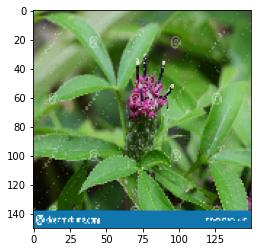

In [68]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Test/LaBachTruat/10.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Lá Bạc Hà'
if round(result[0][1])==1:
  prediction='Lá Bạch Đầu Ông'
if round(result[0][2])==1:
  prediction='Lá Bạch Truất'
if round(result[0][3])==1:
  prediction='Lá Bố Chính Sâm'
if round(result[0][4])==1:
  prediction='Lá Cây Bồ Công Anh'
if round(result[0][5])==1:
  prediction='Lá Cây Bồ Kết'
if round(result[0][6])==1:
  prediction='Lá Cây Bồ Quân'
if round(result[0][7])==1:
  prediction='Lá Cây Cúc Áo'
if round(result[0][8])==1:
  prediction='Lá Cây Diếp Cá'
if round(result[0][9])==1:
  prediction='Lá Cây Đu Đủ'
if round(result[0][10])==1:
  prediction='Lá Cây Dừa Cạn'
if round(result[0][11])==1:
  prediction='Lá Cây Hàm Ếch'
if round(result[0][12])==1:
  prediction='Lá Cây Bạch Hoa Xà Thiệt Thảo'
if round(result[0][13])==1:
  prediction='Lá Cây Hoàng Cầm Râu'
if round(result[0][14])==1:
  prediction='Lá Cây Kha Tử'
if round(result[0][15])==1:
  prediction='Lá Cây Kim Ngân Hoa'
if round(result[0][16])==1:
  prediction='Lá Cây Lược Vàng'
if round(result[0][17])==1:
  prediction='Lá Cây Mãng Cầu'
if round(result[0][18])==1:
  prediction='Lá Cây Nghệ Đen'
if round(result[0][19])==1:
  prediction='Lá Cây Nghệ Vàng '
if round(result[0][20])==1:
  prediction='Lá Cây Ô Liu'
if round(result[0][21])==1:
  prediction='Lá Cây Rau Má'
if round(result[0][22])==1:
  prediction='Lá Cây Rau Sam'
if round(result[0][23])==1:
  prediction='Lá Cây Sê'
if round(result[0][24])==1:
  prediction='Lá Cây Sói Rừng'
if round(result[0][25])==1:
  prediction='Lá Cây Mộc Thông'
if round(result[0][26])==1:
  prediction='Lá Cây Trinh Nữ'
if round(result[0][27])==1:
  prediction='Lá Cây Trinh Nữ Hoàng Cung'
if round(result[0][28])==1:
  prediction='Lá Cây Xạ Đen'
if round(result[0][29])==1:
  prediction='Lá Cây Ý Dĩ'
if round(result[0][30])==1:
  prediction='Lá Cốt Khí'
if round(result[0][31])==1:
  prediction='Lá Cúc Tần'
if round(result[0][32])==1:
  prediction='Lá Dâu Tằm'
if round(result[0][33])==1:
  prediction='Lá Địa Liền'
if round(result[0][34])==1:
  prediction='Lá Gai'
if round(result[0][35])==1:
  prediction='Lá Húng Chanh'
if round(result[0][36])==1:
  prediction='Lá Khổ Sâm'
if round(result[0][37])==1:
  prediction='Lá Mơ'
if round(result[0][38])==1:
  prediction='Lá Ổi'
if round(result[0][39])==1:
  prediction='Lá Tía Tô'
print(prediction)

Lá Cây Lược Vàng


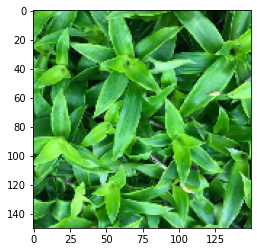

In [69]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Test/LaCayLuocVang/07.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Lá Bạc Hà'
if round(result[0][1])==1:
  prediction='Lá Bạch Đầu Ông'
if round(result[0][2])==1:
  prediction='Lá Bạch Truất'
if round(result[0][3])==1:
  prediction='Lá Bố Chính Sâm'
if round(result[0][4])==1:
  prediction='Lá Cây Bồ Công Anh'
if round(result[0][5])==1:
  prediction='Lá Cây Bồ Kết'
if round(result[0][6])==1:
  prediction='Lá Cây Bồ Quân'
if round(result[0][7])==1:
  prediction='Lá Cây Cúc Áo'
if round(result[0][8])==1:
  prediction='Lá Cây Diếp Cá'
if round(result[0][9])==1:
  prediction='Lá Cây Đu Đủ'
if round(result[0][10])==1:
  prediction='Lá Cây Dừa Cạn'
if round(result[0][11])==1:
  prediction='Lá Cây Hàm Ếch'
if round(result[0][12])==1:
  prediction='Lá Cây Bạch Hoa Xà Thiệt Thảo'
if round(result[0][13])==1:
  prediction='Lá Cây Hoàng Cầm Râu'
if round(result[0][14])==1:
  prediction='Lá Cây Kha Tử'
if round(result[0][15])==1:
  prediction='Lá Cây Kim Ngân Hoa'
if round(result[0][16])==1:
  prediction='Lá Cây Lược Vàng'
if round(result[0][17])==1:
  prediction='Lá Cây Mãng Cầu'
if round(result[0][18])==1:
  prediction='Lá Cây Nghệ Đen'
if round(result[0][19])==1:
  prediction='Lá Cây Nghệ Vàng '
if round(result[0][20])==1:
  prediction='Lá Cây Ô Liu'
if round(result[0][21])==1:
  prediction='Lá Cây Rau Má'
if round(result[0][22])==1:
  prediction='Lá Cây Rau Sam'
if round(result[0][23])==1:
  prediction='Lá Cây Sê'
if round(result[0][24])==1:
  prediction='Lá Cây Sói Rừng'
if round(result[0][25])==1:
  prediction='Lá Cây Mộc Thông'
if round(result[0][26])==1:
  prediction='Lá Cây Trinh Nữ'
if round(result[0][27])==1:
  prediction='Lá Cây Trinh Nữ Hoàng Cung'
if round(result[0][28])==1:
  prediction='Lá Cây Xạ Đen'
if round(result[0][29])==1:
  prediction='Lá Cây Ý Dĩ'
if round(result[0][30])==1:
  prediction='Lá Cốt Khí'
if round(result[0][31])==1:
  prediction='Lá Cúc Tần'
if round(result[0][32])==1:
  prediction='Lá Dâu Tằm'
if round(result[0][33])==1:
  prediction='Lá Địa Liền'
if round(result[0][34])==1:
  prediction='Lá Gai'
if round(result[0][35])==1:
  prediction='Lá Húng Chanh'
if round(result[0][36])==1:
  prediction='Lá Khổ Sâm'
if round(result[0][37])==1:
  prediction='Lá Mơ'
if round(result[0][38])==1:
  prediction='Lá Ổi'
if round(result[0][39])==1:
  prediction='Lá Tía Tô'
print(prediction)

Lá Cây Ô Liu


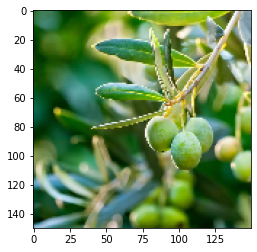

In [71]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Test/LaCayOliu/16.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Lá Bạc Hà'
if round(result[0][1])==1:
  prediction='Lá Bạch Đầu Ông'
if round(result[0][2])==1:
  prediction='Lá Bạch Truất'
if round(result[0][3])==1:
  prediction='Lá Bố Chính Sâm'
if round(result[0][4])==1:
  prediction='Lá Cây Bồ Công Anh'
if round(result[0][5])==1:
  prediction='Lá Cây Bồ Kết'
if round(result[0][6])==1:
  prediction='Lá Cây Bồ Quân'
if round(result[0][7])==1:
  prediction='Lá Cây Cúc Áo'
if round(result[0][8])==1:
  prediction='Lá Cây Diếp Cá'
if round(result[0][9])==1:
  prediction='Lá Cây Đu Đủ'
if round(result[0][10])==1:
  prediction='Lá Cây Dừa Cạn'
if round(result[0][11])==1:
  prediction='Lá Cây Hàm Ếch'
if round(result[0][12])==1:
  prediction='Lá Cây Bạch Hoa Xà Thiệt Thảo'
if round(result[0][13])==1:
  prediction='Lá Cây Hoàng Cầm Râu'
if round(result[0][14])==1:
  prediction='Lá Cây Kha Tử'
if round(result[0][15])==1:
  prediction='Lá Cây Kim Ngân Hoa'
if round(result[0][16])==1:
  prediction='Lá Cây Lược Vàng'
if round(result[0][17])==1:
  prediction='Lá Cây Mãng Cầu'
if round(result[0][18])==1:
  prediction='Lá Cây Nghệ Đen'
if round(result[0][19])==1:
  prediction='Lá Cây Nghệ Vàng '
if round(result[0][20])==1:
  prediction='Lá Cây Ô Liu'
if round(result[0][21])==1:
  prediction='Lá Cây Rau Má'
if round(result[0][22])==1:
  prediction='Lá Cây Rau Sam'
if round(result[0][23])==1:
  prediction='Lá Cây Sê'
if round(result[0][24])==1:
  prediction='Lá Cây Sói Rừng'
if round(result[0][25])==1:
  prediction='Lá Cây Mộc Thông'
if round(result[0][26])==1:
  prediction='Lá Cây Trinh Nữ'
if round(result[0][27])==1:
  prediction='Lá Cây Trinh Nữ Hoàng Cung'
if round(result[0][28])==1:
  prediction='Lá Cây Xạ Đen'
if round(result[0][29])==1:
  prediction='Lá Cây Ý Dĩ'
if round(result[0][30])==1:
  prediction='Lá Cốt Khí'
if round(result[0][31])==1:
  prediction='Lá Cúc Tần'
if round(result[0][32])==1:
  prediction='Lá Dâu Tằm'
if round(result[0][33])==1:
  prediction='Lá Địa Liền'
if round(result[0][34])==1:
  prediction='Lá Gai'
if round(result[0][35])==1:
  prediction='Lá Húng Chanh'
if round(result[0][36])==1:
  prediction='Lá Khổ Sâm'
if round(result[0][37])==1:
  prediction='Lá Mơ'
if round(result[0][38])==1:
  prediction='Lá Ổi'
if round(result[0][39])==1:
  prediction='Lá Tía Tô'
print(prediction)

Lá Cây Trinh Nữ


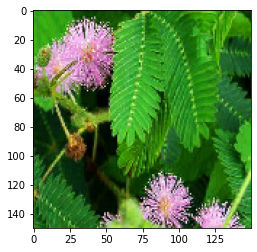

In [72]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Test/LaCayTrinhNu/05.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Lá Bạc Hà'
if round(result[0][1])==1:
  prediction='Lá Bạch Đầu Ông'
if round(result[0][2])==1:
  prediction='Lá Bạch Truất'
if round(result[0][3])==1:
  prediction='Lá Bố Chính Sâm'
if round(result[0][4])==1:
  prediction='Lá Cây Bồ Công Anh'
if round(result[0][5])==1:
  prediction='Lá Cây Bồ Kết'
if round(result[0][6])==1:
  prediction='Lá Cây Bồ Quân'
if round(result[0][7])==1:
  prediction='Lá Cây Cúc Áo'
if round(result[0][8])==1:
  prediction='Lá Cây Diếp Cá'
if round(result[0][9])==1:
  prediction='Lá Cây Đu Đủ'
if round(result[0][10])==1:
  prediction='Lá Cây Dừa Cạn'
if round(result[0][11])==1:
  prediction='Lá Cây Hàm Ếch'
if round(result[0][12])==1:
  prediction='Lá Cây Bạch Hoa Xà Thiệt Thảo'
if round(result[0][13])==1:
  prediction='Lá Cây Hoàng Cầm Râu'
if round(result[0][14])==1:
  prediction='Lá Cây Kha Tử'
if round(result[0][15])==1:
  prediction='Lá Cây Kim Ngân Hoa'
if round(result[0][16])==1:
  prediction='Lá Cây Lược Vàng'
if round(result[0][17])==1:
  prediction='Lá Cây Mãng Cầu'
if round(result[0][18])==1:
  prediction='Lá Cây Nghệ Đen'
if round(result[0][19])==1:
  prediction='Lá Cây Nghệ Vàng '
if round(result[0][20])==1:
  prediction='Lá Cây Ô Liu'
if round(result[0][21])==1:
  prediction='Lá Cây Rau Má'
if round(result[0][22])==1:
  prediction='Lá Cây Rau Sam'
if round(result[0][23])==1:
  prediction='Lá Cây Sê'
if round(result[0][24])==1:
  prediction='Lá Cây Sói Rừng'
if round(result[0][25])==1:
  prediction='Lá Cây Mộc Thông'
if round(result[0][26])==1:
  prediction='Lá Cây Trinh Nữ'
if round(result[0][27])==1:
  prediction='Lá Cây Trinh Nữ Hoàng Cung'
if round(result[0][28])==1:
  prediction='Lá Cây Xạ Đen'
if round(result[0][29])==1:
  prediction='Lá Cây Ý Dĩ'
if round(result[0][30])==1:
  prediction='Lá Cốt Khí'
if round(result[0][31])==1:
  prediction='Lá Cúc Tần'
if round(result[0][32])==1:
  prediction='Lá Dâu Tằm'
if round(result[0][33])==1:
  prediction='Lá Địa Liền'
if round(result[0][34])==1:
  prediction='Lá Gai'
if round(result[0][35])==1:
  prediction='Lá Húng Chanh'
if round(result[0][36])==1:
  prediction='Lá Khổ Sâm'
if round(result[0][37])==1:
  prediction='Lá Mơ'
if round(result[0][38])==1:
  prediction='Lá Ổi'
if round(result[0][39])==1:
  prediction='Lá Tía Tô'
print(prediction)

Lá Cây Trinh Nữ Hoàng Cung


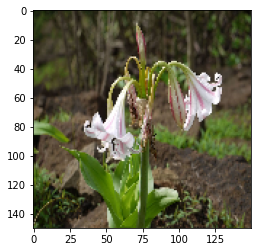

In [79]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Test/LaCayTrinhNuHoangCung/10.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Lá Bạc Hà'
if round(result[0][1])==1:
  prediction='Lá Bạch Đầu Ông'
if round(result[0][2])==1:
  prediction='Lá Bạch Truất'
if round(result[0][3])==1:
  prediction='Lá Bố Chính Sâm'
if round(result[0][4])==1:
  prediction='Lá Cây Bồ Công Anh'
if round(result[0][5])==1:
  prediction='Lá Cây Bồ Kết'
if round(result[0][6])==1:
  prediction='Lá Cây Bồ Quân'
if round(result[0][7])==1:
  prediction='Lá Cây Cúc Áo'
if round(result[0][8])==1:
  prediction='Lá Cây Diếp Cá'
if round(result[0][9])==1:
  prediction='Lá Cây Đu Đủ'
if round(result[0][10])==1:
  prediction='Lá Cây Dừa Cạn'
if round(result[0][11])==1:
  prediction='Lá Cây Hàm Ếch'
if round(result[0][12])==1:
  prediction='Lá Cây Bạch Hoa Xà Thiệt Thảo'
if round(result[0][13])==1:
  prediction='Lá Cây Hoàng Cầm Râu'
if round(result[0][14])==1:
  prediction='Lá Cây Kha Tử'
if round(result[0][15])==1:
  prediction='Lá Cây Kim Ngân Hoa'
if round(result[0][16])==1:
  prediction='Lá Cây Lược Vàng'
if round(result[0][17])==1:
  prediction='Lá Cây Mãng Cầu'
if round(result[0][18])==1:
  prediction='Lá Cây Nghệ Đen'
if round(result[0][19])==1:
  prediction='Lá Cây Nghệ Vàng '
if round(result[0][20])==1:
  prediction='Lá Cây Ô Liu'
if round(result[0][21])==1:
  prediction='Lá Cây Rau Má'
if round(result[0][22])==1:
  prediction='Lá Cây Rau Sam'
if round(result[0][23])==1:
  prediction='Lá Cây Sê'
if round(result[0][24])==1:
  prediction='Lá Cây Sói Rừng'
if round(result[0][25])==1:
  prediction='Lá Cây Mộc Thông'
if round(result[0][26])==1:
  prediction='Lá Cây Trinh Nữ'
if round(result[0][27])==1:
  prediction='Lá Cây Trinh Nữ Hoàng Cung'
if round(result[0][28])==1:
  prediction='Lá Cây Xạ Đen'
if round(result[0][29])==1:
  prediction='Lá Cây Ý Dĩ'
if round(result[0][30])==1:
  prediction='Lá Cốt Khí'
if round(result[0][31])==1:
  prediction='Lá Cúc Tần'
if round(result[0][32])==1:
  prediction='Lá Dâu Tằm'
if round(result[0][33])==1:
  prediction='Lá Địa Liền'
if round(result[0][34])==1:
  prediction='Lá Gai'
if round(result[0][35])==1:
  prediction='Lá Húng Chanh'
if round(result[0][36])==1:
  prediction='Lá Khổ Sâm'
if round(result[0][37])==1:
  prediction='Lá Mơ'
if round(result[0][38])==1:
  prediction='Lá Ổi'
if round(result[0][39])==1:
  prediction='Lá Tía Tô'
print(prediction)

Lá Cây Xạ Đen


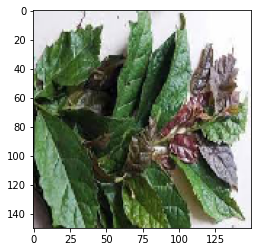

In [75]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Test/LaCayXaDen/02.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Lá Bạc Hà'
if round(result[0][1])==1:
  prediction='Lá Bạch Đầu Ông'
if round(result[0][2])==1:
  prediction='Lá Bạch Truất'
if round(result[0][3])==1:
  prediction='Lá Bố Chính Sâm'
if round(result[0][4])==1:
  prediction='Lá Cây Bồ Công Anh'
if round(result[0][5])==1:
  prediction='Lá Cây Bồ Kết'
if round(result[0][6])==1:
  prediction='Lá Cây Bồ Quân'
if round(result[0][7])==1:
  prediction='Lá Cây Cúc Áo'
if round(result[0][8])==1:
  prediction='Lá Cây Diếp Cá'
if round(result[0][9])==1:
  prediction='Lá Cây Đu Đủ'
if round(result[0][10])==1:
  prediction='Lá Cây Dừa Cạn'
if round(result[0][11])==1:
  prediction='Lá Cây Hàm Ếch'
if round(result[0][12])==1:
  prediction='Lá Cây Bạch Hoa Xà Thiệt Thảo'
if round(result[0][13])==1:
  prediction='Lá Cây Hoàng Cầm Râu'
if round(result[0][14])==1:
  prediction='Lá Cây Kha Tử'
if round(result[0][15])==1:
  prediction='Lá Cây Kim Ngân Hoa'
if round(result[0][16])==1:
  prediction='Lá Cây Lược Vàng'
if round(result[0][17])==1:
  prediction='Lá Cây Mãng Cầu'
if round(result[0][18])==1:
  prediction='Lá Cây Nghệ Đen'
if round(result[0][19])==1:
  prediction='Lá Cây Nghệ Vàng '
if round(result[0][20])==1:
  prediction='Lá Cây Ô Liu'
if round(result[0][21])==1:
  prediction='Lá Cây Rau Má'
if round(result[0][22])==1:
  prediction='Lá Cây Rau Sam'
if round(result[0][23])==1:
  prediction='Lá Cây Sê'
if round(result[0][24])==1:
  prediction='Lá Cây Sói Rừng'
if round(result[0][25])==1:
  prediction='Lá Cây Mộc Thông'
if round(result[0][26])==1:
  prediction='Lá Cây Trinh Nữ'
if round(result[0][27])==1:
  prediction='Lá Cây Trinh Nữ Hoàng Cung'
if round(result[0][28])==1:
  prediction='Lá Cây Xạ Đen'
if round(result[0][29])==1:
  prediction='Lá Cây Ý Dĩ'
if round(result[0][30])==1:
  prediction='Lá Cốt Khí'
if round(result[0][31])==1:
  prediction='Lá Cúc Tần'
if round(result[0][32])==1:
  prediction='Lá Dâu Tằm'
if round(result[0][33])==1:
  prediction='Lá Địa Liền'
if round(result[0][34])==1:
  prediction='Lá Gai'
if round(result[0][35])==1:
  prediction='Lá Húng Chanh'
if round(result[0][36])==1:
  prediction='Lá Khổ Sâm'
if round(result[0][37])==1:
  prediction='Lá Mơ'
if round(result[0][38])==1:
  prediction='Lá Ổi'
if round(result[0][39])==1:
  prediction='Lá Tía Tô'
print(prediction)

Lá Cốt Khí


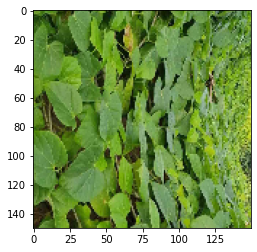

In [80]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Test/LaCotKhi/Image_ 14.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Lá Bạc Hà'
if round(result[0][1])==1:
  prediction='Lá Bạch Đầu Ông'
if round(result[0][2])==1:
  prediction='Lá Bạch Truất'
if round(result[0][3])==1:
  prediction='Lá Bố Chính Sâm'
if round(result[0][4])==1:
  prediction='Lá Cây Bồ Công Anh'
if round(result[0][5])==1:
  prediction='Lá Cây Bồ Kết'
if round(result[0][6])==1:
  prediction='Lá Cây Bồ Quân'
if round(result[0][7])==1:
  prediction='Lá Cây Cúc Áo'
if round(result[0][8])==1:
  prediction='Lá Cây Diếp Cá'
if round(result[0][9])==1:
  prediction='Lá Cây Đu Đủ'
if round(result[0][10])==1:
  prediction='Lá Cây Dừa Cạn'
if round(result[0][11])==1:
  prediction='Lá Cây Hàm Ếch'
if round(result[0][12])==1:
  prediction='Lá Cây Bạch Hoa Xà Thiệt Thảo'
if round(result[0][13])==1:
  prediction='Lá Cây Hoàng Cầm Râu'
if round(result[0][14])==1:
  prediction='Lá Cây Kha Tử'
if round(result[0][15])==1:
  prediction='Lá Cây Kim Ngân Hoa'
if round(result[0][16])==1:
  prediction='Lá Cây Lược Vàng'
if round(result[0][17])==1:
  prediction='Lá Cây Mãng Cầu'
if round(result[0][18])==1:
  prediction='Lá Cây Nghệ Đen'
if round(result[0][19])==1:
  prediction='Lá Cây Nghệ Vàng '
if round(result[0][20])==1:
  prediction='Lá Cây Ô Liu'
if round(result[0][21])==1:
  prediction='Lá Cây Rau Má'
if round(result[0][22])==1:
  prediction='Lá Cây Rau Sam'
if round(result[0][23])==1:
  prediction='Lá Cây Sê'
if round(result[0][24])==1:
  prediction='Lá Cây Sói Rừng'
if round(result[0][25])==1:
  prediction='Lá Cây Mộc Thông'
if round(result[0][26])==1:
  prediction='Lá Cây Trinh Nữ'
if round(result[0][27])==1:
  prediction='Lá Cây Trinh Nữ Hoàng Cung'
if round(result[0][28])==1:
  prediction='Lá Cây Xạ Đen'
if round(result[0][29])==1:
  prediction='Lá Cây Ý Dĩ'
if round(result[0][30])==1:
  prediction='Lá Cốt Khí'
if round(result[0][31])==1:
  prediction='Lá Cúc Tần'
if round(result[0][32])==1:
  prediction='Lá Dâu Tằm'
if round(result[0][33])==1:
  prediction='Lá Địa Liền'
if round(result[0][34])==1:
  prediction='Lá Gai'
if round(result[0][35])==1:
  prediction='Lá Húng Chanh'
if round(result[0][36])==1:
  prediction='Lá Khổ Sâm'
if round(result[0][37])==1:
  prediction='Lá Mơ'
if round(result[0][38])==1:
  prediction='Lá Ổi'
if round(result[0][39])==1:
  prediction='Lá Tía Tô'
print(prediction)

Lá Dâu Tằm


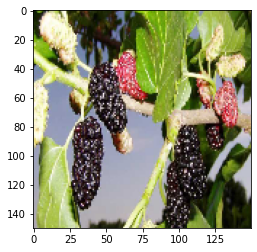

In [83]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Test/LaDauTam/Image_ 16.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Lá Bạc Hà'
if round(result[0][1])==1:
  prediction='Lá Bạch Đầu Ông'
if round(result[0][2])==1:
  prediction='Lá Bạch Truất'
if round(result[0][3])==1:
  prediction='Lá Bố Chính Sâm'
if round(result[0][4])==1:
  prediction='Lá Cây Bồ Công Anh'
if round(result[0][5])==1:
  prediction='Lá Cây Bồ Kết'
if round(result[0][6])==1:
  prediction='Lá Cây Bồ Quân'
if round(result[0][7])==1:
  prediction='Lá Cây Cúc Áo'
if round(result[0][8])==1:
  prediction='Lá Cây Diếp Cá'
if round(result[0][9])==1:
  prediction='Lá Cây Đu Đủ'
if round(result[0][10])==1:
  prediction='Lá Cây Dừa Cạn'
if round(result[0][11])==1:
  prediction='Lá Cây Hàm Ếch'
if round(result[0][12])==1:
  prediction='Lá Cây Bạch Hoa Xà Thiệt Thảo'
if round(result[0][13])==1:
  prediction='Lá Cây Hoàng Cầm Râu'
if round(result[0][14])==1:
  prediction='Lá Cây Kha Tử'
if round(result[0][15])==1:
  prediction='Lá Cây Kim Ngân Hoa'
if round(result[0][16])==1:
  prediction='Lá Cây Lược Vàng'
if round(result[0][17])==1:
  prediction='Lá Cây Mãng Cầu'
if round(result[0][18])==1:
  prediction='Lá Cây Nghệ Đen'
if round(result[0][19])==1:
  prediction='Lá Cây Nghệ Vàng '
if round(result[0][20])==1:
  prediction='Lá Cây Ô Liu'
if round(result[0][21])==1:
  prediction='Lá Cây Rau Má'
if round(result[0][22])==1:
  prediction='Lá Cây Rau Sam'
if round(result[0][23])==1:
  prediction='Lá Cây Sê'
if round(result[0][24])==1:
  prediction='Lá Cây Sói Rừng'
if round(result[0][25])==1:
  prediction='Lá Cây Mộc Thông'
if round(result[0][26])==1:
  prediction='Lá Cây Trinh Nữ'
if round(result[0][27])==1:
  prediction='Lá Cây Trinh Nữ Hoàng Cung'
if round(result[0][28])==1:
  prediction='Lá Cây Xạ Đen'
if round(result[0][29])==1:
  prediction='Lá Cây Ý Dĩ'
if round(result[0][30])==1:
  prediction='Lá Cốt Khí'
if round(result[0][31])==1:
  prediction='Lá Cúc Tần'
if round(result[0][32])==1:
  prediction='Lá Dâu Tằm'
if round(result[0][33])==1:
  prediction='Lá Địa Liền'
if round(result[0][34])==1:
  prediction='Lá Gai'
if round(result[0][35])==1:
  prediction='Lá Húng Chanh'
if round(result[0][36])==1:
  prediction='Lá Khổ Sâm'
if round(result[0][37])==1:
  prediction='Lá Mơ'
if round(result[0][38])==1:
  prediction='Lá Ổi'
if round(result[0][39])==1:
  prediction='Lá Tía Tô'
print(prediction)

Lá Cây Dừa Cạn


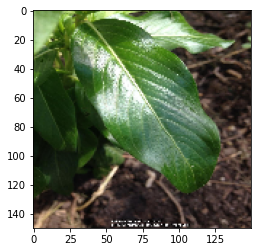

In [85]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Test/LaCayDuaCan/02.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Lá Bạc Hà'
if round(result[0][1])==1:
  prediction='Lá Bạch Đầu Ông'
if round(result[0][2])==1:
  prediction='Lá Bạch Truất'
if round(result[0][3])==1:
  prediction='Lá Bố Chính Sâm'
if round(result[0][4])==1:
  prediction='Lá Cây Bồ Công Anh'
if round(result[0][5])==1:
  prediction='Lá Cây Bồ Kết'
if round(result[0][6])==1:
  prediction='Lá Cây Bồ Quân'
if round(result[0][7])==1:
  prediction='Lá Cây Cúc Áo'
if round(result[0][8])==1:
  prediction='Lá Cây Diếp Cá'
if round(result[0][9])==1:
  prediction='Lá Cây Đu Đủ'
if round(result[0][10])==1:
  prediction='Lá Cây Dừa Cạn'
if round(result[0][11])==1:
  prediction='Lá Cây Hàm Ếch'
if round(result[0][12])==1:
  prediction='Lá Cây Bạch Hoa Xà Thiệt Thảo'
if round(result[0][13])==1:
  prediction='Lá Cây Hoàng Cầm Râu'
if round(result[0][14])==1:
  prediction='Lá Cây Kha Tử'
if round(result[0][15])==1:
  prediction='Lá Cây Kim Ngân Hoa'
if round(result[0][16])==1:
  prediction='Lá Cây Lược Vàng'
if round(result[0][17])==1:
  prediction='Lá Cây Mãng Cầu'
if round(result[0][18])==1:
  prediction='Lá Cây Nghệ Đen'
if round(result[0][19])==1:
  prediction='Lá Cây Nghệ Vàng '
if round(result[0][20])==1:
  prediction='Lá Cây Ô Liu'
if round(result[0][21])==1:
  prediction='Lá Cây Rau Má'
if round(result[0][22])==1:
  prediction='Lá Cây Rau Sam'
if round(result[0][23])==1:
  prediction='Lá Cây Sê'
if round(result[0][24])==1:
  prediction='Lá Cây Sói Rừng'
if round(result[0][25])==1:
  prediction='Lá Cây Mộc Thông'
if round(result[0][26])==1:
  prediction='Lá Cây Trinh Nữ'
if round(result[0][27])==1:
  prediction='Lá Cây Trinh Nữ Hoàng Cung'
if round(result[0][28])==1:
  prediction='Lá Cây Xạ Đen'
if round(result[0][29])==1:
  prediction='Lá Cây Ý Dĩ'
if round(result[0][30])==1:
  prediction='Lá Cốt Khí'
if round(result[0][31])==1:
  prediction='Lá Cúc Tần'
if round(result[0][32])==1:
  prediction='Lá Dâu Tằm'
if round(result[0][33])==1:
  prediction='Lá Địa Liền'
if round(result[0][34])==1:
  prediction='Lá Gai'
if round(result[0][35])==1:
  prediction='Lá Húng Chanh'
if round(result[0][36])==1:
  prediction='Lá Khổ Sâm'
if round(result[0][37])==1:
  prediction='Lá Mơ'
if round(result[0][38])==1:
  prediction='Lá Ổi'
if round(result[0][39])==1:
  prediction='Lá Tía Tô'
print(prediction)

Lá Húng Chanh


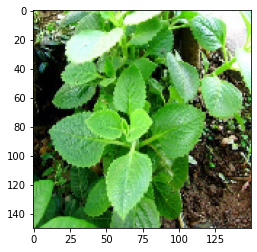

In [87]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/DATASETLACAYTHUOC/Test/LaHungChanh/Image_ 16.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Lá Bạc Hà'
if round(result[0][1])==1:
  prediction='Lá Bạch Đầu Ông'
if round(result[0][2])==1:
  prediction='Lá Bạch Truất'
if round(result[0][3])==1:
  prediction='Lá Bố Chính Sâm'
if round(result[0][4])==1:
  prediction='Lá Cây Bồ Công Anh'
if round(result[0][5])==1:
  prediction='Lá Cây Bồ Kết'
if round(result[0][6])==1:
  prediction='Lá Cây Bồ Quân'
if round(result[0][7])==1:
  prediction='Lá Cây Cúc Áo'
if round(result[0][8])==1:
  prediction='Lá Cây Diếp Cá'
if round(result[0][9])==1:
  prediction='Lá Cây Đu Đủ'
if round(result[0][10])==1:
  prediction='Lá Cây Dừa Cạn'
if round(result[0][11])==1:
  prediction='Lá Cây Hàm Ếch'
if round(result[0][12])==1:
  prediction='Lá Cây Bạch Hoa Xà Thiệt Thảo'
if round(result[0][13])==1:
  prediction='Lá Cây Hoàng Cầm Râu'
if round(result[0][14])==1:
  prediction='Lá Cây Kha Tử'
if round(result[0][15])==1:
  prediction='Lá Cây Kim Ngân Hoa'
if round(result[0][16])==1:
  prediction='Lá Cây Lược Vàng'
if round(result[0][17])==1:
  prediction='Lá Cây Mãng Cầu'
if round(result[0][18])==1:
  prediction='Lá Cây Nghệ Đen'
if round(result[0][19])==1:
  prediction='Lá Cây Nghệ Vàng '
if round(result[0][20])==1:
  prediction='Lá Cây Ô Liu'
if round(result[0][21])==1:
  prediction='Lá Cây Rau Má'
if round(result[0][22])==1:
  prediction='Lá Cây Rau Sam'
if round(result[0][23])==1:
  prediction='Lá Cây Sê'
if round(result[0][24])==1:
  prediction='Lá Cây Sói Rừng'
if round(result[0][25])==1:
  prediction='Lá Cây Mộc Thông'
if round(result[0][26])==1:
  prediction='Lá Cây Trinh Nữ'
if round(result[0][27])==1:
  prediction='Lá Cây Trinh Nữ Hoàng Cung'
if round(result[0][28])==1:
  prediction='Lá Cây Xạ Đen'
if round(result[0][29])==1:
  prediction='Lá Cây Ý Dĩ'
if round(result[0][30])==1:
  prediction='Lá Cốt Khí'
if round(result[0][31])==1:
  prediction='Lá Cúc Tần'
if round(result[0][32])==1:
  prediction='Lá Dâu Tằm'
if round(result[0][33])==1:
  prediction='Lá Địa Liền'
if round(result[0][34])==1:
  prediction='Lá Gai'
if round(result[0][35])==1:
  prediction='Lá Húng Chanh'
if round(result[0][36])==1:
  prediction='Lá Khổ Sâm'
if round(result[0][37])==1:
  prediction='Lá Mơ'
if round(result[0][38])==1:
  prediction='Lá Ổi'
if round(result[0][39])==1:
  prediction='Lá Tía Tô'
print(prediction)